In [1]:
import pandas as pd, numpy as np
df = pd.read_excel('DATASET.xlsx')
df

C:\Users\singh\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\singh\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Conditional Formatting extension is not supported and will be removed
  for idx, row in parser.parse():


,Unnamed: 0,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.520
1,NaN,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.620
2,NaN,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.680
3,NaN,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.780
4,NaN,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,NaN,6,454.0,931.8,13.6,125.0,13,116,4150,830,15.1,1.8,1.0,15,1.681
1005,NaN,7,454.0,703.0,14.5,17.0,13,118,4150,830,24.6,7.9,2.0,15,1.838
1006,NaN,8,454.0,1124.1,14.9,45.0,18,117,4200,840,119.0,15.7,2.0,16,1.862
1007,NaN,9,454.0,1462.3,13.2,62.0,27,117,4400,720,138.2,30.5,6.0,18,1.883


In [2]:
# PREPROCESSING AND CLEANING
df = df.drop([910, 911, 912, 913, 914, 915, 916, 917, 918])
df.fillna(0, inplace=True)
j = 0
for i in range(100):
 df.iloc[j:j + 10, 0] = df.iloc[j, 0]
 j += 10

In [3]:
df_test = df.loc[df['year'] == 10]
df_test

,Unnamed: 0,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
9,Sec_1,10,324.0,53.6,19.0,0.0,2,105,7567,1885,16.8,105.0,65.0,9,1.960
19,Sec_2,10,327.7,62.0,22.7,0.0,2,102,30525,10234,76.5,44.3,5.0,9,0.795
29,Sec_3,10,487.7,93.2,22.5,0.0,4,110,2140,1270,78.5,0.0,0.0,16,1.432
39,Sec_4,10,543.6,93.2,22.5,0.0,4,110,2140,1270,28.5,60.5,67.0,11,2.004
49,Sec_5,10,434.4,149.0,11.7,72.0,3,110,13142,6225,0.0,276.2,34.0,6,1.792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,Sec_97,10,514.0,1226.4,10.1,203.6,16,114,7672,303,219.7,206.2,10.0,8,1.607
978,Sec_98,10,901.0,1531.0,11.1,34.9,40,100,15150,1077,5.9,74.5,33.0,13,1.087
988,Sec_99,10,1181.0,1364.9,9.2,274.3,24,112,12500,880,131.4,72.4,18.0,12,0.996
998,Sec_100,10,662.0,1110.7,12.8,33.2,27,117,3324,1356,193.7,305.6,180.0,12,2.212


In [4]:
#Renaming first column
df.columns = df.columns.str.replace('Unnamed: 0', 'Group')
df_test.columns = df_test.columns.str.replace('Unnamed: 0', 'Group')

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import xgboost as xg
xgb_r = xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 150, nthread=4, scale_pos_weight=1,seed=27)

C:\Users\singh\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [5]:
predicted = {'Para-9': [], 'Para-10': [], 'Para-11': [], 'Para-12': [], 'Para-13': []}
names = ['Para-9', 'Para-10', 'Para-11', 'Para-12', 'Para-13']
rmse = []
N = 0
index = 0
for j in [10, 11, 12, 13, 14]:
  ans = 0
  count = 0
  for i in range(0, 1000, 10):
    xtrain = df.iloc[i:i+9, 1:10]
    ytrain = df.iloc[i:i+9, j]
    xtest = df.iloc[i+9, 1:10].to_numpy()
    ytest = df.iloc[i+9, j]
    xgb_r.fit(xtrain, ytrain)
    ypred = xgb_r.predict(xtest.reshape(1,-1))[0]
    predicted[names[index]].append(ypred)
    ans += (ytest - ypred)**2
    count += 1
    N += 1
  rmse.append(ans)
  index += 1

C:\Users\singh\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [6]:
df_pred = pd.DataFrame.from_dict(predicted)
df_pred

,Para-9,Para-10,Para-11,Para-12,Para-13
0,3.398811e+00,6.049885e+01,5.699891e+01,7.999336,1.918818
1,6.089891e+01,3.019855e+01,9.993413e-01,7.999299,0.792745
2,7.539892e+01,1.575426e-21,1.575426e-21,13.998545,1.412780
3,2.479873e+01,5.698064e+01,6.399891e+01,7.999380,1.887874
4,1.575426e-21,2.617977e+02,3.399949e+01,5.999571,1.768963
...,...,...,...,...,...
95,1.893978e+02,1.916988e+02,9.998878e+00,7.998791,1.554789
96,5.198826e+00,7.109889e+01,2.399929e+01,11.999558,1.075073
97,1.221987e+02,6.769852e+01,1.499837e+01,11.998895,0.981828
98,1.407989e+02,2.927989e+02,1.669982e+02,11.999269,2.120749


In [9]:
#RMSE for each column
for i in rmse:
 print((i/count)**0.5)

43.55268048992029
31.47703064814566
14.272986241244691
13.715414147031584
0.10357705355713089


In [10]:
#Total RMSE
print((sum(rmse)/N)**0.5)

25.610470069699083


In [11]:
import matplotlib.pyplot as plt
import math
import random

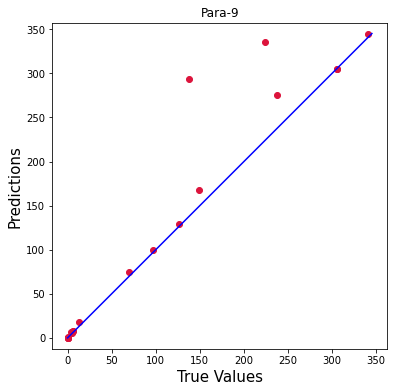

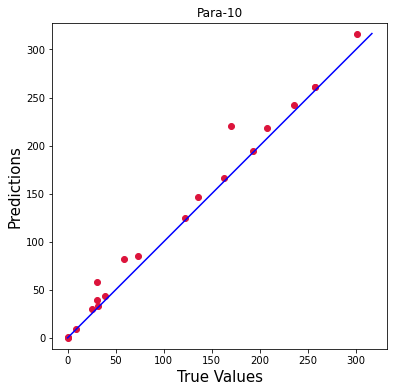

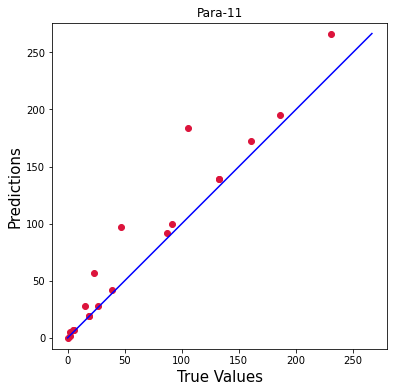

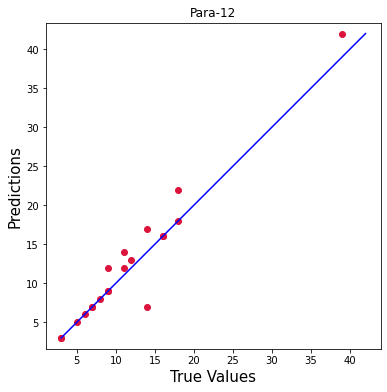

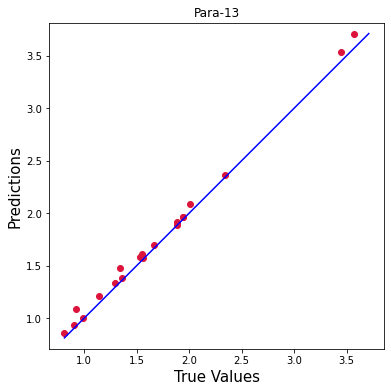

In [12]:
ind = []
for i in range(20):
 ind.append(random.randint(0,100))
#Scatter plot for random 20 rows out of 100 for each target column
for i in range(5):
 plt.figure(figsize=(6,6))
 true_value = df_pred.iloc[ind, i]
 predicted_value = df_test.iloc[ind, i + 10]
 plt.scatter(true_value, predicted_value, c='crimson')
 # plt.yscale('log')
 # plt.xscale('log')
 p1 = max(max(predicted_value), max(true_value))
 p2 = min(min(predicted_value), min(true_value))
 plt.plot([p1, p2], [p1, p2], 'b-')
 plt.title(names[i])
 plt.xlabel('True Values', fontsize=15)
 plt.ylabel('Predictions', fontsize=15)
 plt.axis('equal')
 plt.show()

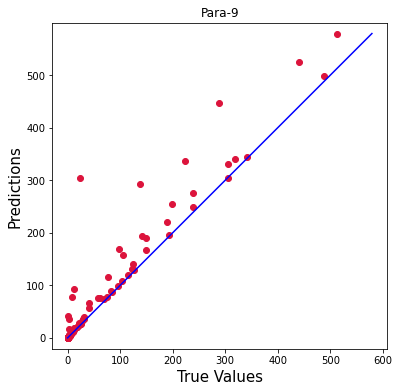

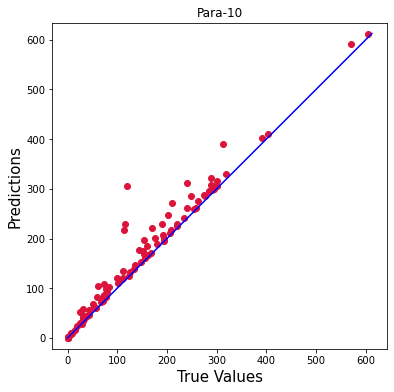

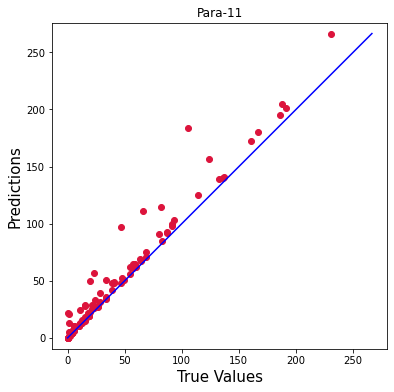

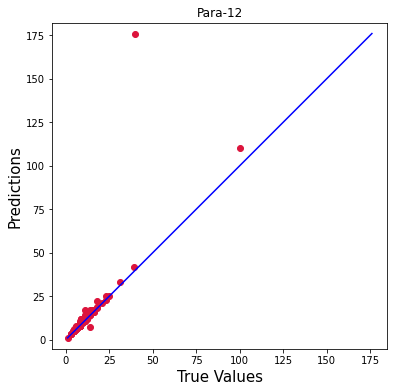

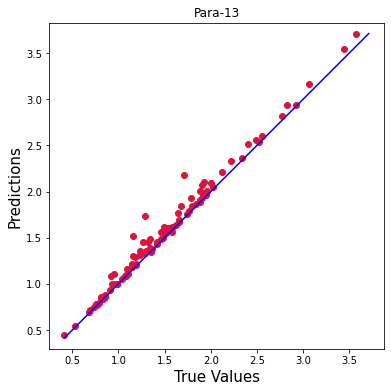

In [13]:
#Scatter plot for all "year = 10" rows for each target column
for i in range(5):
 plt.figure(figsize=(6,6))
 true_value = df_pred.iloc[:, i]
 predicted_value = df_test.iloc[:, i + 10]
 plt.scatter(true_value, predicted_value, c='crimson')
 p1 = max(max(predicted_value), max(true_value))
 p2 = min(min(predicted_value), min(true_value))
 plt.plot([p1, p2], [p1, p2], 'b-')
 plt.title(names[i])
 plt.xlabel('True Values', fontsize=15)
 plt.ylabel('Predictions', fontsize=15)
 plt.axis('equal')
 plt.show()